# Regresja liniowa

20 listopad 2017

#### Wstęp

Regresja linionowa jest jedną z prostszych metod przewidywania wartości oczekiwanej y na podstawie wartości innej zmiennej x. Ujmując problem inaczej można powiedzieć, że regresja liniowa opisuje jak jedna lub kilka zmiennych x determinuje zmienną przewidywaną y. W praktyce sprowadza się to do prostego pytania jak przewidzieć wartość zmiennej mając do dyspozycji zbiór innych zmiennych. 

Regresja liniowa jest metodą, która w odróżnieniu od wielu innych nie tylko przewiduje wartość zmiennej wyjściowej ale również mówi jaki wpływ na zmienną wyjściową mają poszczególne zmienne wejściowe.

Choć model zakłada niezależność zmiennych wejściowych oraz liniową zależność zmiennej wyjściowej czyli przewidywanej od zmiennych wejściowych, model można stosować w wielu rzeczywistych przypadkach.

Prezentowany materiał zakłada znajomość podstaw pythona i statystyki.


#### Narzędzia

Do budowy modelu, analizy i prezentacji wyników użyty zostanie pakiet narzędzi scikit-learn, numpy, pandas oraz matplotlib.

---

*Importujemy wszystkie potrzebne biblioteki*

In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
import sklearn
import pandas as pd

*Dane wejściowe pochodzą ze zbioru danych języka R (Rdatasets) i dotyczą cen sprzedaży domów w mieście Windsor (Sales Prices of Houses in the City of Windsor).*

*Poniżej prezentuję opis wszystkich zmiennych zbioru danych:*

<p>A dataframe containing :
</p>

<dl>
<dt>price</dt><dd><p>sale price of a house</p>
</dd>
<dt>lotsize</dt><dd><p>the lot size of a property in square feet</p>
</dd>
<dt>bedrooms</dt><dd><p>number of bedrooms</p>
</dd>
<dt>bathrms</dt><dd><p>number of full bathrooms</p>
</dd>
<dt>stories</dt><dd><p>number of stories excluding basement</p>
</dd>
<dt>driveway</dt><dd><p>does the house has a driveway ?</p>
</dd>
<dt>recroom</dt><dd><p>does the house has a recreational room ?</p>
</dd>
<dt>fullbase</dt><dd><p>does the house has a full finished basement ?</p>
</dd>
<dt>gashw</dt><dd><p>does the house uses gas for hot water heating ?</p>
</dd>
<dt>airco</dt><dd><p>does the house has central air conditioning ?</p>
</dd>
<dt>garagepl</dt><dd><p>number of garage places</p>
</dd>
<dt>prefarea</dt><dd><p>is the house located in the preferred neighbourhood of the city ?</p>
</dd>
</dl>

*W tym kroku ładujemy dane do tabeli (DataFrame)*

In [2]:
# Load CSV and columns
df = pd.read_csv("Housing.csv")

*Kolumna price jest naszą zmienną którą będziemy chcieli przewidywać. Reszta z nich to dane wejściowe, które posłużą nam do przewidywania ceny domu*

In [3]:
df.head(n=5)

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


*Przed przystąpieniem do budowy modelu z naszej tabeli danych pobieramy daną wyjściową i zapisujemy ją do zmiennej Y. W zmiennej X będą przechowywane dane wejściowe. Musimy najpierw usunąć zmienną wyjściową oraz zmienną "Unnamed: 0"*

In [4]:
from sklearn.linear_model import LinearRegression
Y = df['price']
X = df.drop('price', axis=1)
X = X.drop('Unnamed: 0', axis=1)
X.head(n=5)

,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,5850,3,1,2,yes,no,yes,no,no,1,no
1,4000,2,1,1,yes,no,no,no,no,0,no
2,3060,3,1,1,yes,no,no,no,no,0,no
3,6650,3,1,2,yes,yes,no,no,no,0,no
4,6360,2,1,1,yes,no,no,no,no,0,no


*Jak widzimy dane wejściowe zawierają zmienne jakościowe. W takim przypadku należy je przekształcić na zmienne wskaźnikowe*

In [5]:
cols_to_transform = [ 'driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'prefarea' ]
X_conv = pd.get_dummies(X, columns = cols_to_transform )
X_conv.head(n=5)

,lotsize,bedrooms,bathrms,stories,garagepl,driveway_no,driveway_yes,recroom_no,recroom_yes,fullbase_no,fullbase_yes,gashw_no,gashw_yes,airco_no,airco_yes,prefarea_no,prefarea_yes
0,5850,3,1,2,1,0,1,1,0,0,1,1,0,1,0,1,0
1,4000,2,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0
2,3060,3,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0
3,6650,3,1,2,0,0,1,0,1,1,0,1,0,1,0,1,0
4,6360,2,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0


*Tworzymy model regresji liniowej a następnie budujemy go*

In [6]:
lm = LinearRegression()
lm.fit(X_conv, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

*Pierwsza wartość (Intercept) jest teoretyczną ceną nieruchomości przy której wszystkie zmienne wejściowe są równe zeru. Druga mówi nam o ilości zmiennych wejściowych* 

In [7]:
print('Intercept: ', lm.intercept_)
print('Number of coefficients:', len(lm.coef_))

Intercept:  21704.278658
Number of coefficients: 17


*Jedno z ciekawszych miejsc analizy. Zbudowany model pozwala na oszacowanie wpływu poszczególnych zmiennych na cenę nieruchomości*

*I tak wielkość powierzchnii (lotsize) przekłada się na ceną w taki sposób, że jedna stopa kwadratowa podnosi cenę o 3.5 dolara. Każda dodatkowa sypialnia (bedrooms) podnosi wartość o 1832 dolary a obecność podjazdu (driveway_yes) podnosi wartość nieruchomości o 3343 dolary*

In [8]:
pd.DataFrame(list(zip(X_conv.columns, lm.coef_)), columns = ['feature','estimatedCoefficients'])

,feature,estimatedCoefficients
0,lotsize,3.546303
1,bedrooms,1832.003466
2,bathrms,14335.558468
3,stories,6556.945711
4,garagepl,4244.829004
5,driveway_no,-3343.889445
6,driveway_yes,3343.889445
7,recroom_no,-2255.641913
8,recroom_yes,2255.641913
9,fullbase_no,-2726.192770


*Poniższy wykres prezentuje zależność ceny (Y) od wielkości nieruchomości*

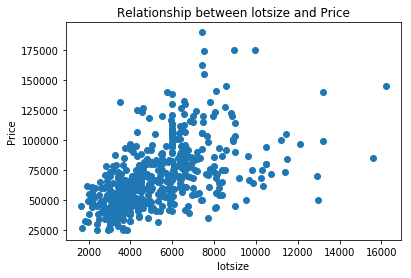

In [9]:
plt.scatter(X_conv.lotsize, Y)
plt.xlabel('lotsize')
plt.ylabel('Price')
plt.title('Relationship between lotsize and Price')

plt.show()

*Predykcja zmiennej wyjściowej to proste wywołanie funkcji predict na zbudowanych (fit) wcześniej modelu. Poniższa tabela prezentuje zestawienie zniennej przewidywanej i rzeczywistej dla kilku pierwszych nieruchomości*

In [10]:
pred = lm.predict(X_conv)

pd.DataFrame(list(zip(pred[:5],Y[:5])), columns = ['predicted','real'])

,predicted,real
0,66037.975672,42000.0
1,41391.151457,38500.0
2,39889.630131,49500.0
3,63689.087331,60500.0
4,49760.426466,61000.0


*A tak prezentuje się zależność pomiedzy zmienną rzeczywistą i przewidywaną*

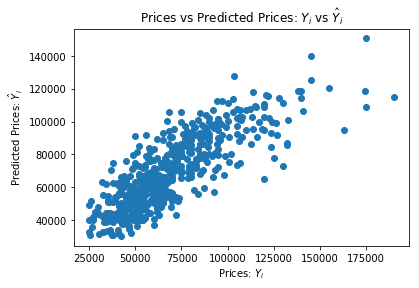

In [11]:
plt.scatter(Y, pred)
plt.xlabel('Prices: $Y_i$')
plt.ylabel('Predicted Prices: $\hat{Y}_i$')
plt.title('Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$')

plt.show()

*A to ten sam wykres co powyżej ale wykonany przy użyciu pakietu Seaborn*

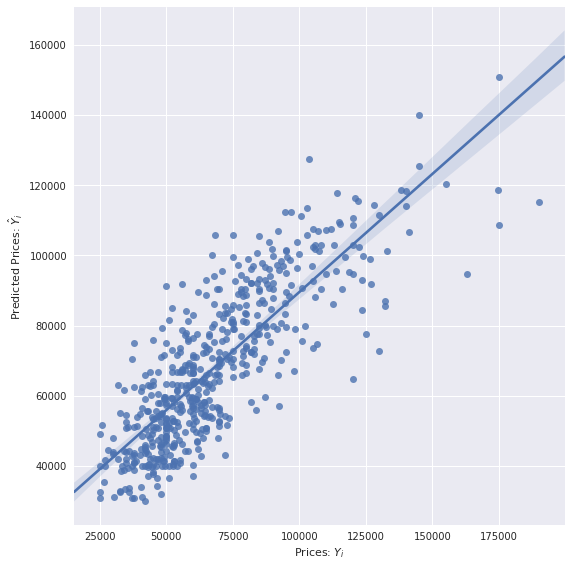

In [12]:
import seaborn as sns
sns.set()

houses = pd.DataFrame(list(zip(pred,Y)), columns = ['predicted_price','real_price'])

g = sns.lmplot(x="real_price", y="predicted_price", #hue="species",
               truncate=False, size=8, data=houses)

g.set_axis_labels("Prices: $Y_i$", "Predicted Prices: $\hat{Y}_i$")

*Błąd średniokwadratowy (MSE, Mean Squared Error) jest jedną z miar jakości zbudowanego modelu*

In [13]:
mseFull = np.mean( (Y-pred) ** 2)
print("MSE: {0:12,.0f}" .format(mseFull))

MSE:  232,646,651


*Budowanie modelu na całym zbiorze danych wejściowych jest metodologicznie błędne. Prawidłowym podejściem jest podział na zbiór treningowy i testowy*

In [14]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    X_conv, Y, test_size=0.33, random_state=5)

print("Rozmiar pełnych danych wejściowych:      {}".format(X_conv.shape))
print("Rozmiar pełnych danych wyjściowych:      {}".format(Y.shape))

print("Rozmiar treningowych danych wejściowych: {}".format(X_train.shape))
print("Rozmiar testowych danych wejściowych:    {}".format(X_test.shape))
print("Rozmiar treningowych danych wyjściowych: {}".format(Y_train.shape))
print("Rozmiar testowych danych wejściowych:    {}".format(Y_test.shape))

Rozmiar pełnych danych wejściowych:      (546, 17)
Rozmiar pełnych danych wyjściowych:      (546,)
Rozmiar treningowych danych wejściowych: (365, 17)
Rozmiar testowych danych wejściowych:    (181, 17)
Rozmiar treningowych danych wyjściowych: (365,)
Rozmiar testowych danych wejściowych:    (181,)


*Po podziale danych model uczony jest na zbiorze danych treningowych*

In [15]:
lm = LinearRegression()
lm.fit(X_train, Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

print("Fit a model X_train, and calculate MSE with Y_train: {0:12,.0f}" .format(np.mean((Y_train - pred_train) ** 2)))
print("Fit a model X_test, and calculate MSE with Y_test: {0:12,.0f}" .format(np.mean((Y_test - pred_test) ** 2)))

Fit a model X_train, and calculate MSE with Y_train:  269,199,927
Fit a model X_test, and calculate MSE with Y_test:  164,321,287


*Jednym ze sposobów oceny jakości modelu jest wyznaczenie reszt modelu - różnicy pomiędzy wartościami wyznaczanymi przez model a wartościami rzeczywistymi. Rozkład reszt powinien być normalny czyli w praktyce punkty na wykresie powinny być losowo rozrzucone wokół osi x*

Text(0,0.5,'Residuals')

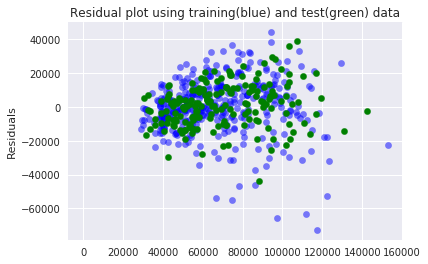

In [16]:
plt.scatter(lm.predict(X_train), lm.predict(X_train)-Y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test)-Y_test, c='g', s=40)
plt.hlines(y=0, xmin=0, xmax=50)
plt.title('Residual plot using training(blue) and test(green) data')
plt.ylabel('Residuals')

*Bardziej formalnym sposobem sprawdzenia normalności rozkładu reszt jest wykonanie testu normalności rozkładu*

In [17]:
from scipy import stats
x = lm.predict(X_test)-Y_test
#x = lm.predict(X_train)-Y_train
k2, p = stats.normaltest(x)
alpha = 1e-3
print("p = {:g}".format(p))

p = 0.411313


In [18]:
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("Hipoteza zerowa może być odrzucona")
else:
    print("Brak podstaw do odrzucenia hipotezy zerowej")

Brak podstaw do odrzucenia hipotezy zerowej
